In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [49]:
df = pd.read_csv("Supermart_Grocery_Dataset.csv")

In [50]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [51]:
df.isnull().sum()


,0
Order ID,0
Customer Name,0
Category,0
Sub Category,0
City,0
Order Date,0
Region,0
Sales,0
Discount,0
Profit,0


In [52]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


## dataset description

In [53]:
print(df[['Sales', 'Discount', 'Profit']].describe())


             Sales     Discount       Profit
count  9994.000000  9994.000000  9994.000000
mean   1496.596158     0.226817   374.937082
std     577.559036     0.074636   239.932881
min     500.000000     0.100000    25.250000
25%    1000.000000     0.160000   180.022500
50%    1498.000000     0.230000   320.780000
75%    1994.750000     0.290000   525.627500
max    2500.000000     0.350000  1120.950000


we can check here that there is only one state in whole dataset and there is no duplicate rows

In [54]:
print(df['State'].nunique(), df.duplicated().sum())

1 0


# Categories distribution

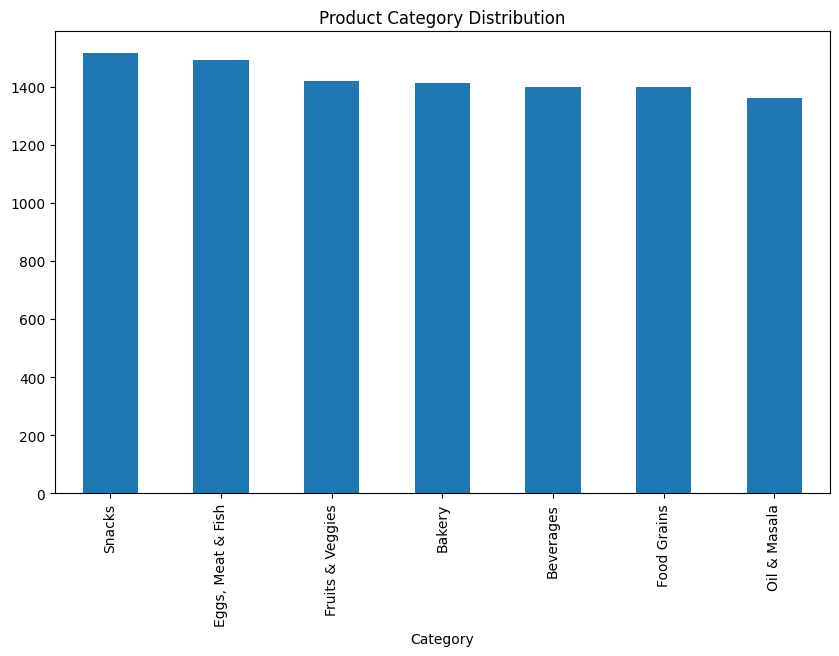

In [55]:
plt.figure(figsize=(10,6))
df['Category'].value_counts().plot(kind='bar')
plt.title('Product Category Distribution')
plt.show()

# selling trends

<ipython-input-56-8ef157840837>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()


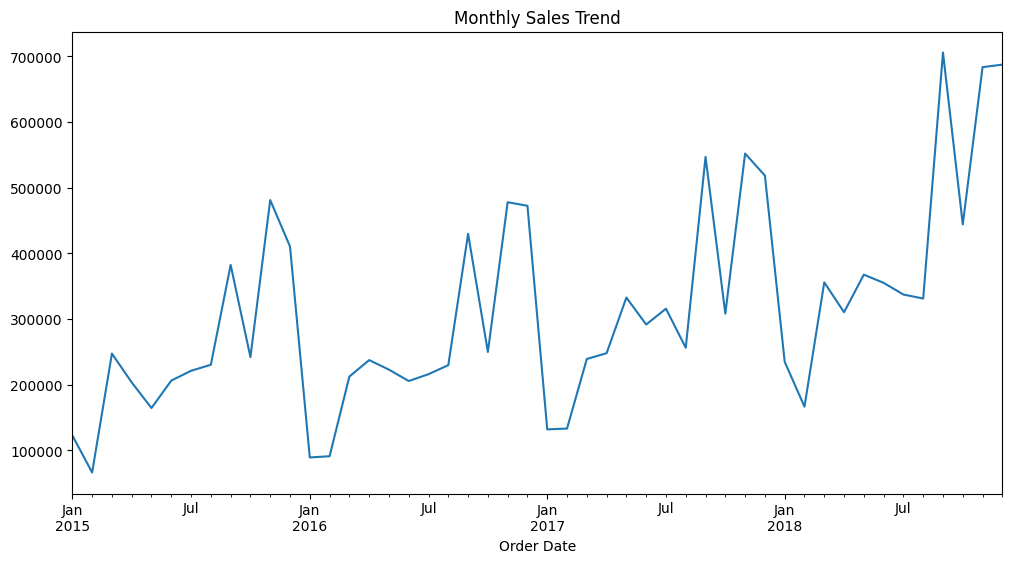

In [56]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed')
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()
monthly_sales.plot(figsize=(12,6))
plt.title('Monthly Sales Trend')
plt.show()

# Relationship of profit and discount

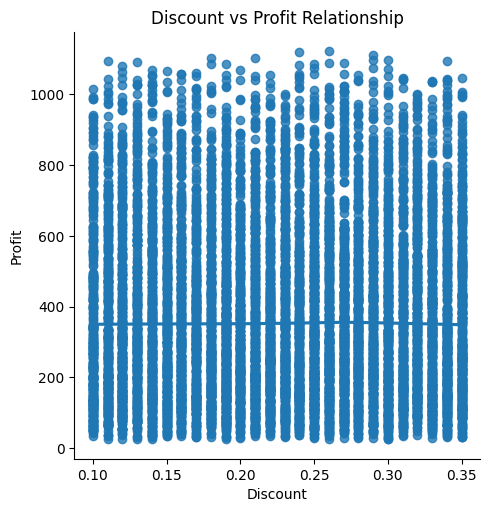

In [57]:
sns.lmplot(x='Discount', y='Profit', data=df, lowess=True)
plt.title('Discount vs Profit Relationship')
plt.show()

# Some regional analysis

In [58]:
# Count of each unique value in the 'Region' column
region_counts = df['Region'].value_counts()

# Print the result
print(region_counts)

Region
West       3203
East       2848
Central    2323
South      1619
North         1
Name: count, dtype: int64



===== Regional Analysis =====
           Sales      Profit
Region                      
Central  3468156   856806.84
East     4248368  1074345.58
North       1254      401.28
South    2440461   623562.89
West     4798743  1192004.61


<ipython-input-59-5257b42b9d18>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales_profit.index, y='Sales', data=region_sales_profit, palette='viridis')


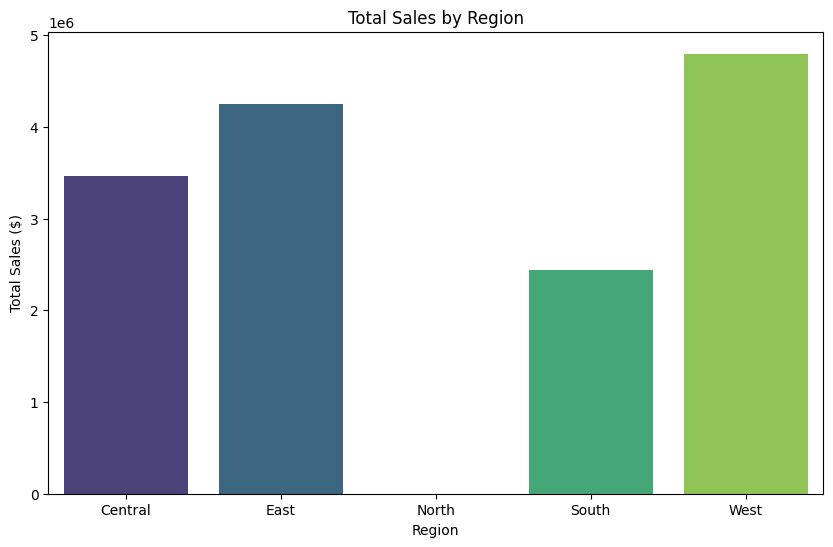

In [59]:
print("\n===== Regional Analysis =====")
region_sales_profit = df.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'})
print(region_sales_profit)

plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales_profit.index, y='Sales', data=region_sales_profit, palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')
plt.show()

# profit and sales changes during the years

create new dataframe to keep year and month, we also do not need state column anymore

In [62]:
df_tf = df.copy()
df_tf['Year'] = df['Order Date'].dt.year
df_tf['Month'] = df['Order Date'].dt.month
df_tf.drop('State', axis=1)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,Year,Month
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,2017,11
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,2017,11
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,2017,6
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,2016,10
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,2016,10
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10,2015,12
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70,2015,7
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,2017,6
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24,2018,10


<Axes: xlabel='Month', ylabel='Sales'>

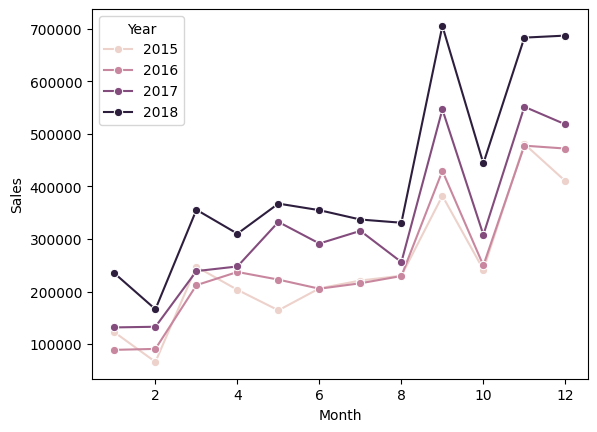

In [63]:
Monthly_Sales = df_tf.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

sns.lineplot(data = Monthly_Sales, x = 'Month', y = 'Sales', hue = 'Year', marker ='o')

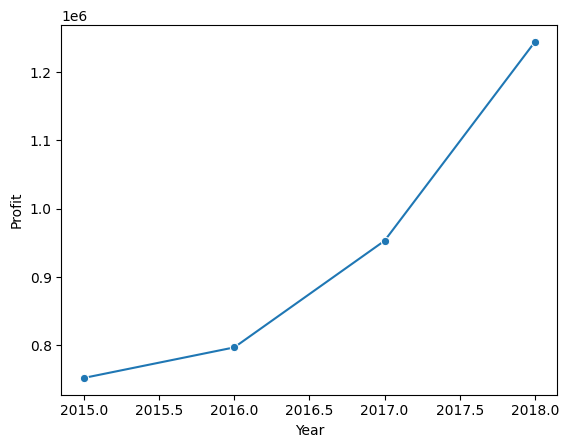

In [64]:
yearly_profit = df_tf.groupby('Year')['Profit'].sum().reset_index()
sns.lineplot(data = yearly_profit, x = 'Year', y = 'Profit', marker='o')
plt.show()

sales in different cities

<ipython-input-65-82390704e900>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= df['City'], y = df['Sales'], palette='Spectral')


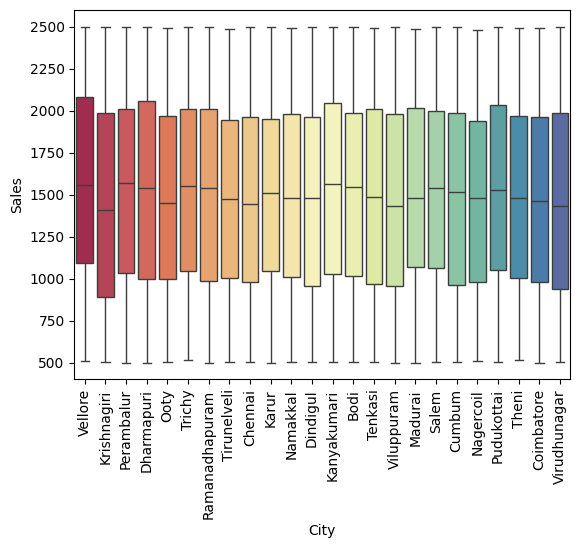

In [65]:
sns.boxplot(x= df['City'], y = df['Sales'], palette='Spectral')
plt.xticks(rotation = 90)
plt.show()

Customer Analysis

In [67]:
print("\n===== Customer Analysis =====")
top_customers = df_tf.groupby('Customer Name').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values(by='Sales', ascending=False)
print("Top 10 Customers by Sales:")
print(top_customers.head(10))


===== Customer Analysis =====
Top 10 Customers by Sales:
                Sales    Profit
Customer Name                  
Krithika       334361  85633.03
Amrish         333351  80191.89
Verma          331665  79096.53
Arutra         325720  87572.40
Vidya          321798  86725.64
Vinne          319565  79873.12
Shah           318588  73786.22
Suresh         315973  77450.88
Adavan         315341  78044.29
Surya          312645  80996.85


<ipython-input-68-ed7f890be2ca>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_10_customers.index, rotation=45)


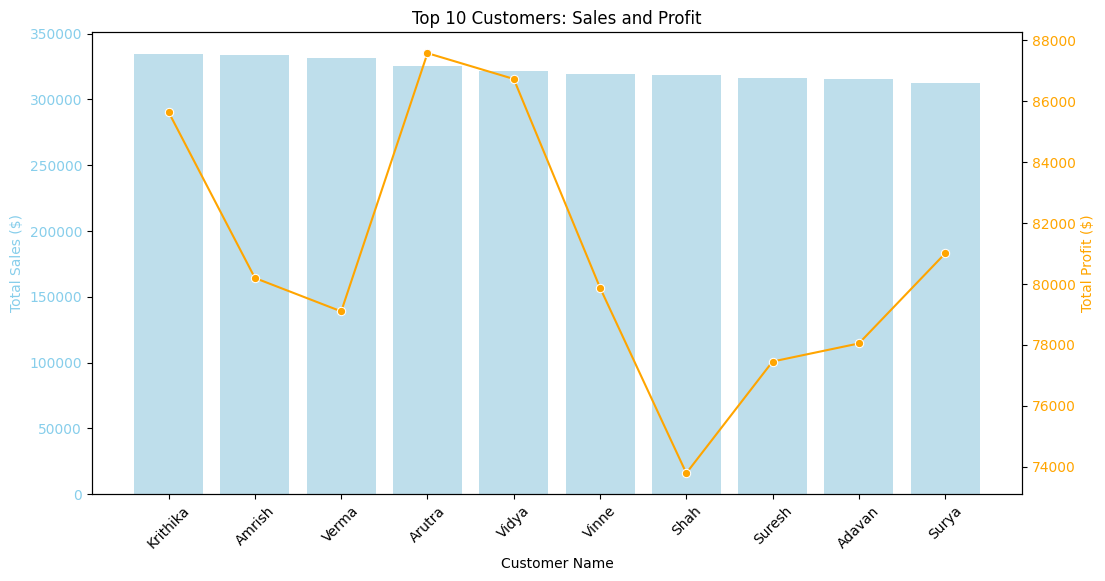

In [68]:
top_10_customers = top_customers.head(10)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Sales
sns.barplot(x=top_10_customers.index, y='Sales', data=top_10_customers, ax=ax1, color='skyblue', alpha=0.6)
ax1.set_ylabel('Total Sales ($)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(top_10_customers.index, rotation=45)

# Line plot for Profit
ax2 = ax1.twinx()
sns.lineplot(x=top_10_customers.index, y='Profit', data=top_10_customers, ax=ax2, color='orange', marker='o')
ax2.set_ylabel('Total Profit ($)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Top 10 Customers: Sales and Profit')
plt.show()

top cities by sales


In [69]:
df_tf.groupby('City')['Sales'].sum().sort_values(ascending = False).head(3)

,Sales
City,
Kanyakumari,706764
Vellore,676550
Bodi,667177


# Correlation analysis


===== Correlation Analysis =====
             Sales  Discount    Profit
Sales     1.000000 -0.005512  0.605349
Discount -0.005512  1.000000  0.000017
Profit    0.605349  0.000017  1.000000


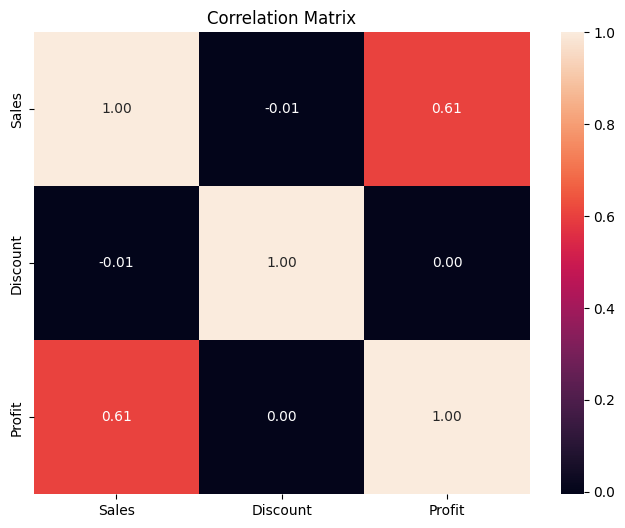

In [70]:
print("\n===== Correlation Analysis =====")
correlation_matrix = df_tf[['Sales', 'Discount', 'Profit']].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot = True, fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()


# Profitability analysis


===== Profitability Analysis =====
Category
Bakery               0.250941
Beverages            0.251429
Eggs, Meat & Fish    0.249020
Food Grains          0.249914
Fruits & Veggies     0.252412
Oil & Masala         0.243990
Snacks               0.253494
Name: Profit Margin, dtype: float64


<ipython-input-72-3046e8e82ee1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_margin_by_category.index, y=profit_margin_by_category.values, palette='viridis')


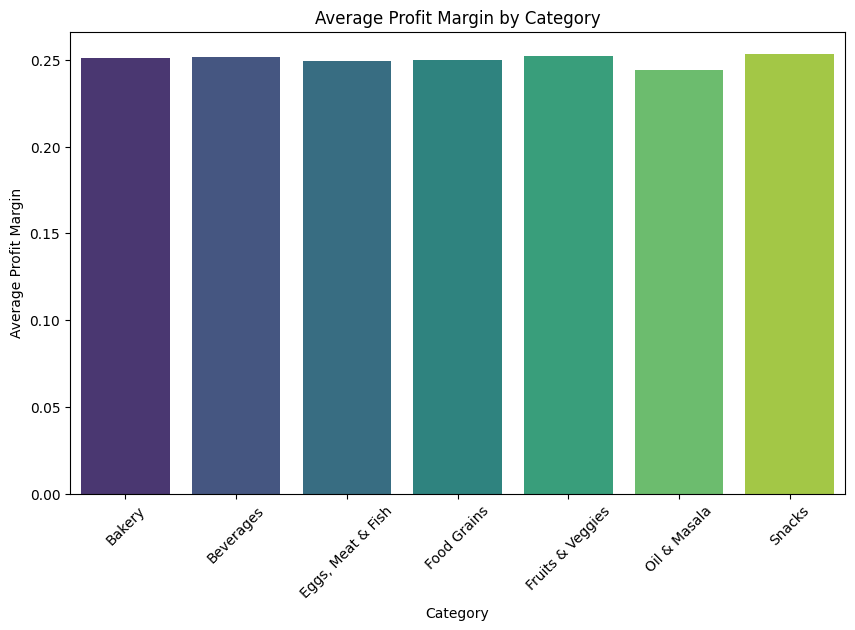

In [72]:
print("\n===== Profitability Analysis =====")
df_tf['Profit Margin'] = df_tf['Profit'] / df['Sales']
profit_margin_by_category = df_tf.groupby('Category')['Profit Margin'].mean()
print(profit_margin_by_category)

plt.figure(figsize=(10, 6))
sns.barplot(x=profit_margin_by_category.index, y=profit_margin_by_category.values, palette='viridis')
plt.title('Average Profit Margin by Category')
plt.xlabel('Category')
plt.ylabel('Average Profit Margin')
plt.xticks(rotation=45)
plt.show()

# top-performing sub-categories

In [73]:
df_tf.groupby(['Year','Sub Category'])['Sales'].sum().reset_index()


,Year,Sub Category,Sales
0,2015,Atta & Flour,90855
1,2015,Biscuits,135267
2,2015,Breads & Buns,151383
3,2015,Cakes,147329
4,2015,Chicken,118173
...,...,...,...
87,2018,Organic Staples,181753
88,2018,Organic Vegetables,163087
89,2018,Rice,160491
90,2018,Soft Drinks,350604


In [74]:
grouped = df_tf.groupby(['Year','Sub Category'])['Sales'].sum().reset_index()

idx = grouped.groupby('Year')['Sales'].idxmax()
grouped.loc[idx]

,Year,Sub Category,Sales
13,2015,Health Drinks,224977
44,2016,Soft Drinks,222429
67,2017,Soft Drinks,276727
82,2018,Health Drinks,356324


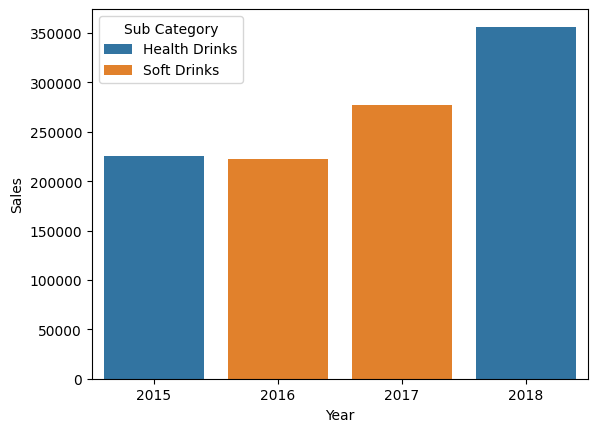

In [75]:
top_sub_categories = grouped.loc[idx]
sns.barplot(data = top_sub_categories, x = 'Year', y = 'Sales', hue = 'Sub Category')
plt.show()